# 第八章 降维

In [1]:
import numpy as np
import sklearn.datasets as datas


In [5]:
[X, t] = datas.make_swiss_roll(500, noise=0.2)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

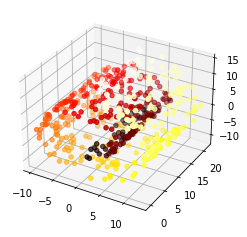

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=t, cmap=plt.cm.hot)

In [16]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color = t)
fig.show()

In [17]:
px.scatter(X2D[:,0],X2D[:,1], color=t)

In [18]:
pca = PCA(n_components = 2, svd_solver="randomized")
X2D = pca.fit_transform(X)
px.scatter(X2D[:,0],X2D[:,1], color=t)

In [27]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)
px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=600, height=600)

In [26]:
rbf_pca = KernelPCA(n_components=2, kernel='linear')
X_reduced = rbf_pca.fit_transform(X)
px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=600, height=600)

In [25]:
rbf_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001)
X_reduced = rbf_pca.fit_transform(X)
px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=600, height=600)

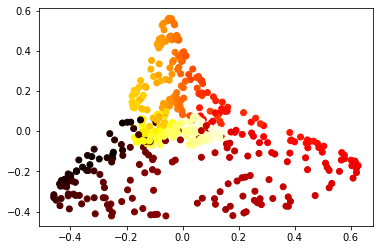

In [28]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np


In [89]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2))
])


In [90]:
param_grid = [{
    "kpca_gamma":np.linspace(0.03, 0.05, 10),
    "kpca_kernel":["rbf","sigmoid"]
}]


In [91]:
grid_search = GridSearchCV(clf, param_grid, cv=5)


In [92]:
y = t > 6.9

In [94]:
grid_search.fit(X, y)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('kpca', KernelPCA(n_components=2))]) does not.

In [95]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

In [96]:
px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=600, height=600)

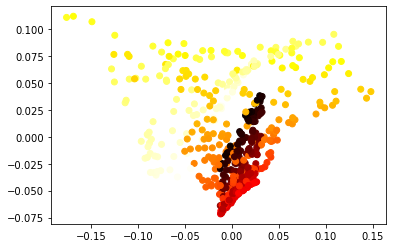

In [97]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

In [98]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced = mds.fit_transform(X)
px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=600, height=600)

In [100]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced = isomap.fit_transform(X)
px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=600, height=600)

In [101]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=800, height=800)

In [102]:
import umap
%time X_reduced = umap.UMAP().fit_transform(X)

Wall time: 8.45 s


In [103]:
%time px.scatter(x=X_reduced[:,0],y=X_reduced[:,1],color=t, width=800, height=800)

Wall time: 113 ms
